# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.2.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

## Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
visa = pd.read_csv('/content/drive/MyDrive/dataset/EasyVisa.csv')

In [ ]:
# copying data to another variable to avoid any changes to original data
data = visa.copy()

## Data Overview

- Observations
- Sanity checks

### View the first and last 5 rows of the dataset

In [ ]:
# view top 5 rows of the data
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
# view last 5 rows of the data
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


Observation

The dataset contains information:

- The unique identifier of each case of visa application.
- The continent of the employee.
- The education level of the employee.
- The job experience and if training is required for the employee.
- Number of employees in the company.
- Year the company was established
- The region of employment of the employee in the US.
- The prevailing wage of the employee, in order for foreign workers are not underpaid.
- The wage unit of the employee in hourly, weekly, monthly, and yearly.
- The position recognition type is full-time or part-time for employees.
- The case status for visas certified or denied.

### Understand the shape of the dataset

In [ ]:
# view dimensions of the data
data.shape

(25480, 12)

Observation

The dataset has 25480 columns and 12 rows.

### Check the data types of the columns for the dataset

In [ ]:
# View datatype of  the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
# checking for duplicate values
data.duplicated().sum()

0

observation

- No duplicate value in the dataset
- The dataset has 3 numeric data types and 9 object data types.
- There are no missing values in the dataset.

### Statistical summary of the dataset

In [ ]:
# statistical summary of numeric the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


Observation

The above table displays the descriptive analysis of the numeric columns.

- **no_of_employees :** The dataset reveals a wide range from small to extremely large organizations (median: 2,109; max: 602,069), with high variability, potential data quality issues (e.g., a negative minimum), and significant skewness due to outliers.

- **yr_of_estab :** The dataset shows the year of establishment spans 1800–2016, with most organizations formed after 1976 (median: 1997) and relatively low variability.

- **prevailing_wage :** The dataset shows significant disparities (median: 70,308.21; max: 319,210.27) dollars, high variability, and potential data quality issues, with wages ranging from 2.14 to 319,210.27 dollars.

- The negative value for employees and the extremely low minimum wage should be investigated and cleaned.

- The maximum values for employees and wages are significantly higher than the 75th percentiles, suggesting the data might be skewed.


In [ ]:
# statistical summary of object the data
data.describe(include='object').T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


Observation

The above table displays the descriptive analysis of the object columns.

- **Case ID:** Each record corresponds to a unique case, suggesting this column serves as a primary identifier.

- **Continent:** Asia dominates the dataset, making up a significant majority of the cases out of the 6 unique continents represented.

- **Education of Employees:** 4 unique levels of education are present, and a bachelor's degree is the most prevalent educational qualification among employees.

- **Has Job Experience:** A majority of employees have prior job experience.

- **Requires Job Training:** Most jobs in this dataset do not require additional training.

- **Region of Employment:** 5 unique regions are represented, and the Northeast region is the most common employment location.

- **Unit of Wage:** 4 unique units of wage are present, and wages are predominantly reported on an annual basis.

- **Full-Time Position:** The majority of positions in this dataset are full-time roles.

- **Case Status:** Most cases in the dataset have been certified, indicating a high approval rate.

### Fixing the negative values in number of employees columns

In [ ]:
# check negative values in the employee column
data.loc[data["no_of_employees"] < 0].shape

(33, 12)

In [ ]:
# taking the absolute values for number of employees
data["no_of_employees"] = abs(data["no_of_employees"])

Observation

- 33 rows with negative employee counts, and the dataset has 12 columns.
- We fix the issue of negative values in the no_of_employees column that are non-negative by converting any negative values to positive ones.

### Let's check the count of each unique category in each of the categorical variables

In [ ]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
--------------------------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, 

Observation

- The dataset primarily consists of unique cases from Asia, involving highly educated employees (Bachelor’s or above) with prior experience, working full-time positions in regions like the Northeast.
- Most roles do not require training and report wages on a yearly basis.
- The majority of cases have been certified, suggesting a favorable outcome rate.

### Let's drop the Case_ID column

In [ ]:
# checking the number of unique values
data["case_id"].nunique()

25480

In [ ]:
# drop 'case_id' column from the data
data.drop(["case_id"], axis=1, inplace=True)

data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


Observation

The Case_ID column contains only unique values, so we can drop it.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

### Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Observations on number of employees

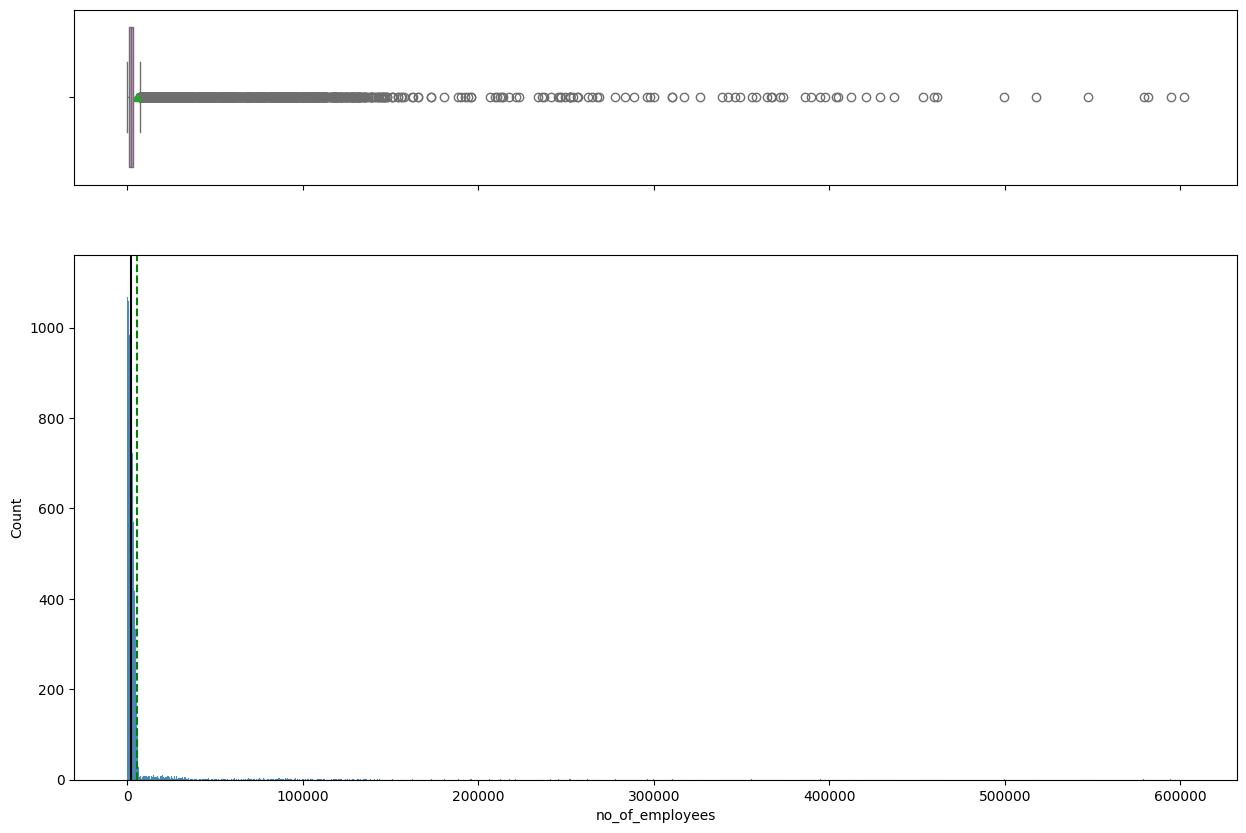

In [ ]:
# number of employees
histogram_boxplot(data, "no_of_employees")

Observation

The distribution is heavily peaked from the beginning, along with a significant number of outliers.

#### Observations on prevailing wage

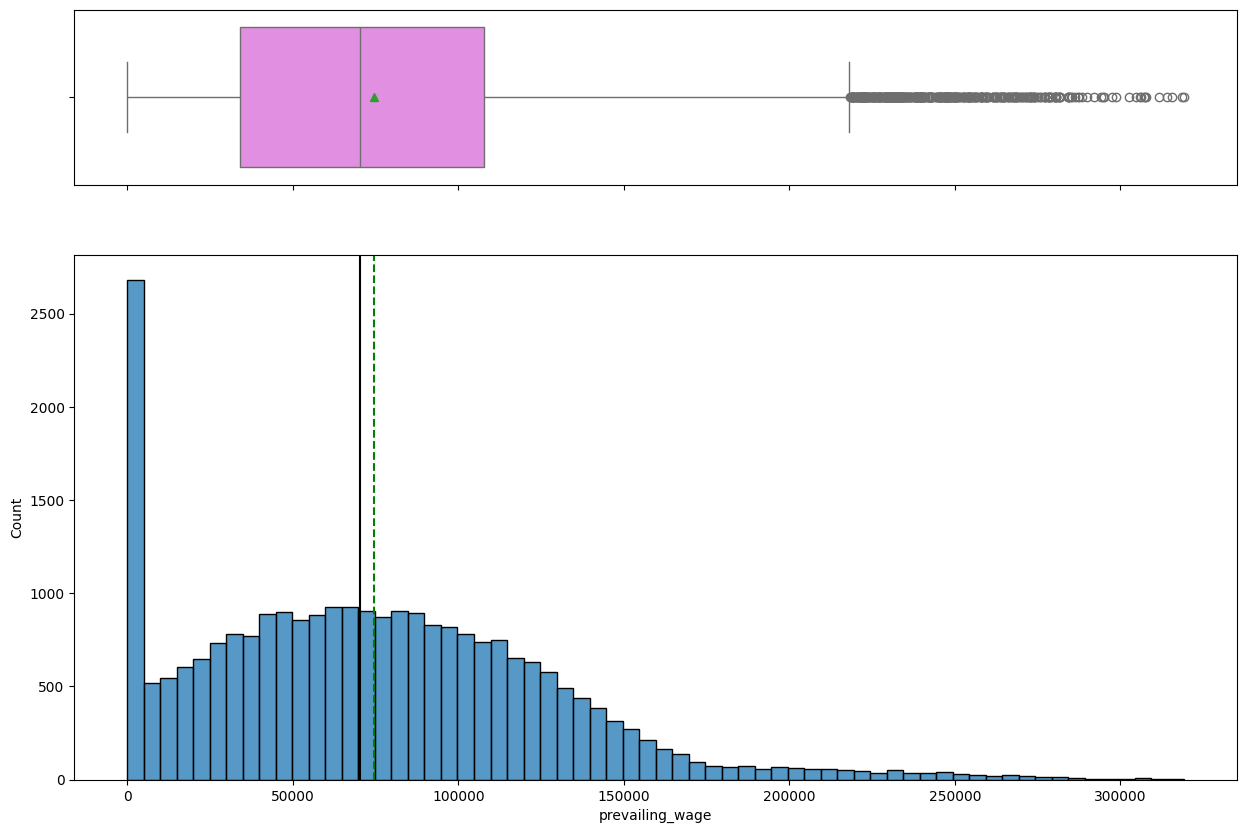

In [ ]:
# prevailing wage
histogram_boxplot(data, "prevailing_wage")

Observation

- The distribution has a peak at the start and is nearly symmetric, with some outliers to the right.

In [ ]:
# the observations which have less than 100 prevailing wage
data.loc[data["prevailing_wage"] < 100]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
338,Asia,Bachelor's,Y,N,2114,2012,Northeast,15.7716,Hour,Y,Certified
634,Asia,Master's,N,N,834,1977,Northeast,3.3188,Hour,Y,Denied
839,Asia,High School,Y,N,4537,1999,West,61.1329,Hour,Y,Denied
876,South America,Bachelor's,Y,N,731,2004,Northeast,82.0029,Hour,Y,Denied
995,Asia,Master's,N,N,302,2000,South,47.4872,Hour,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25023,Asia,Bachelor's,N,Y,3200,1994,South,94.1546,Hour,Y,Denied
25258,Asia,Bachelor's,Y,N,3659,1997,South,79.1099,Hour,Y,Denied
25308,North America,Master's,N,N,82953,1977,Northeast,42.7705,Hour,Y,Denied
25329,Africa,Bachelor's,N,N,2172,1993,Northeast,32.9286,Hour,Y,Denied


In [ ]:
# the count of the values in the mentioned column
data.loc[data["prevailing_wage"] < 100, "unit_of_wage"].value_counts()

,unit_of_wage
Hour,176


Observation

The prevailing_wage column is less than 100 and is counted for unit of wage: hour to be 176, typically worked in a given period (often a month).

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on continent

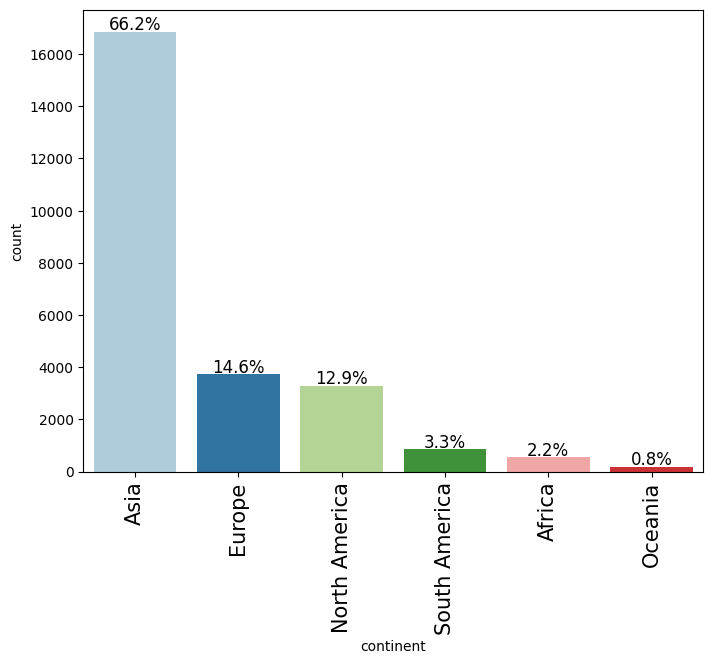

In [ ]:
# continent distribution
labeled_barplot(data, "continent", perc=True)

Observation

- The bar plot reveals that the majority of foreign workers are from Asia, accounting for 66.2%.
- The smallest percentages are from Oceania (0.8%), Africa (2.2%), and South America (3.3%).
- The other varying percentages are from Europe (14.6%) and North America (12.9%).

#### Observations on education of employee

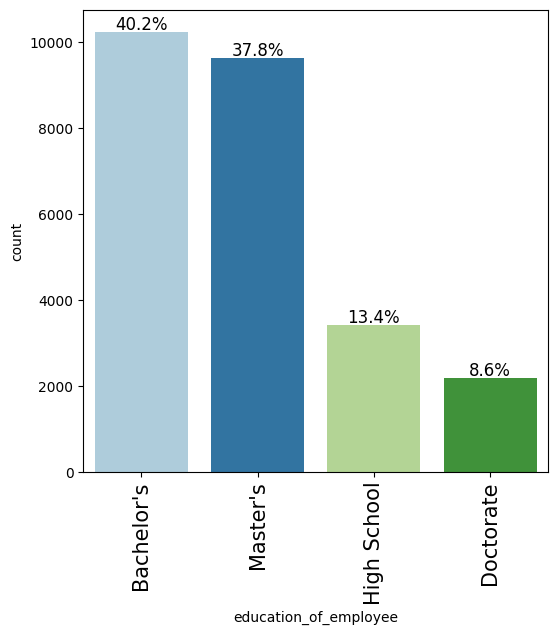

In [ ]:
# education of employee
labeled_barplot(data, "education_of_employee", perc=True)

Observation

- A small proportion of employees have a Doctorate degree (8.6%) or a High School diploma (13.4%).
- The majority of employees hold either a Bachelor's degree (40.2%) or a Master's degree (37.8%).

#### Observations on job experience

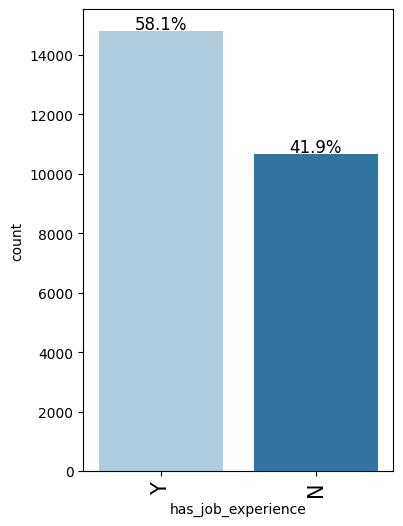

In [ ]:
# job experience
labeled_barplot(data, "has_job_experience", perc=True)

Observation

The bar plot indicates that 58.1% of employees have job experience, while 41.9% lack any prior job experience.

#### Observations on job training

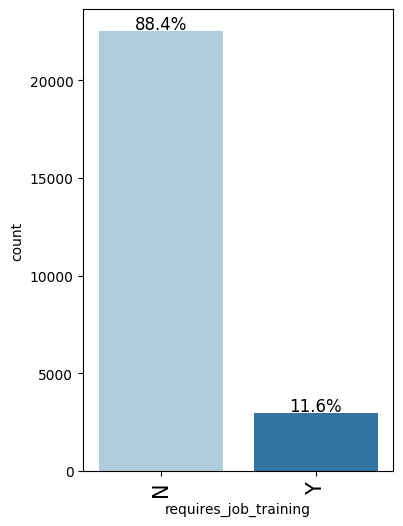

In [ ]:
# job training
labeled_barplot(data, "requires_job_training", perc=True)

Observation

The bar plot shows that 88.4% of employees do not require job training, while 11.6% do.

#### Observations on region of employment

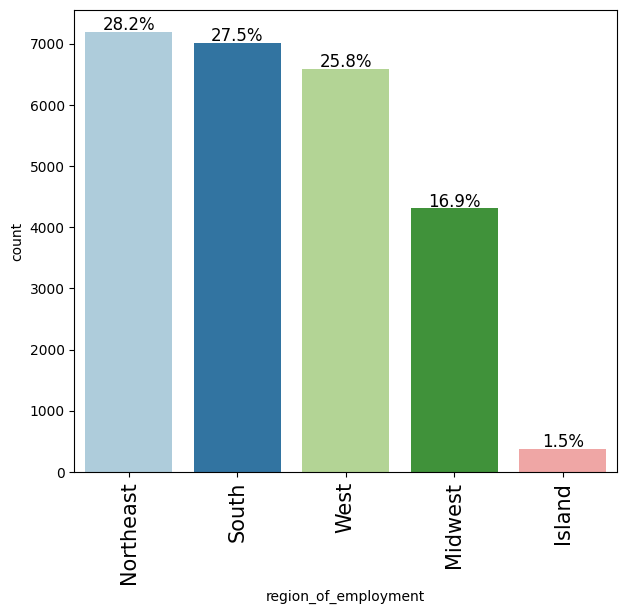

In [ ]:
# region of employment
labeled_barplot(data, "region_of_employment", perc=True)

Observation

- The bar plot shows that the most common intended regions of employment in the US are the Northeast (28.2%), South (27.5%), and West (25.8%).
- The least common regions are the Midwest (16.9%) and Islands (1.5%).

#### Observations on unit of wage

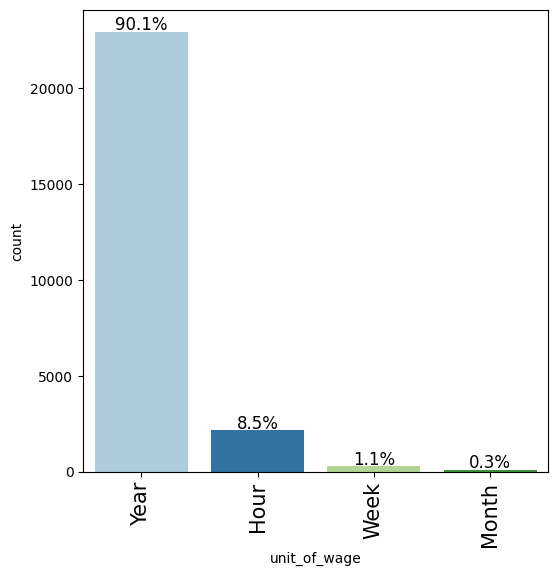

In [ ]:
# unit of wage
labeled_barplot(data, "unit_of_wage", perc=True)

Observation

- The bar plot indicates that the most common unit of wage is yearly, accounting for 90.1%. The least common units are monthly (0.3%), followed by weekly (1.1%) and hourly (8.5%).

#### Observations on case status

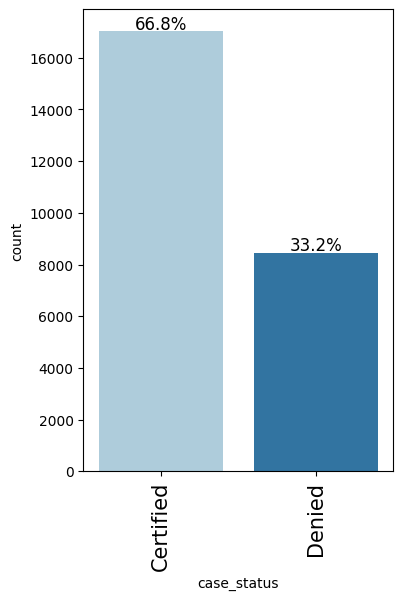

In [ ]:
# case status
labeled_barplot(data, "case_status", perc=True)

Observation

- The bar plot shows that 66.8% of visas were flagged as certified, while 33.2% were denied.

### Bivariate Analysis

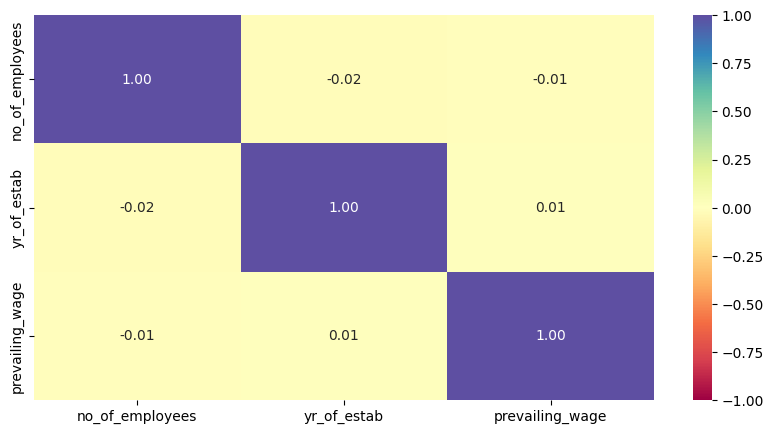

In [ ]:
# correlation between the variables
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Observation

- The heatmap reveals a negative correlation between the number of employees with prevailing wage and the year of establishment.

#### **Creating functions that will help us with further analysis.**

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


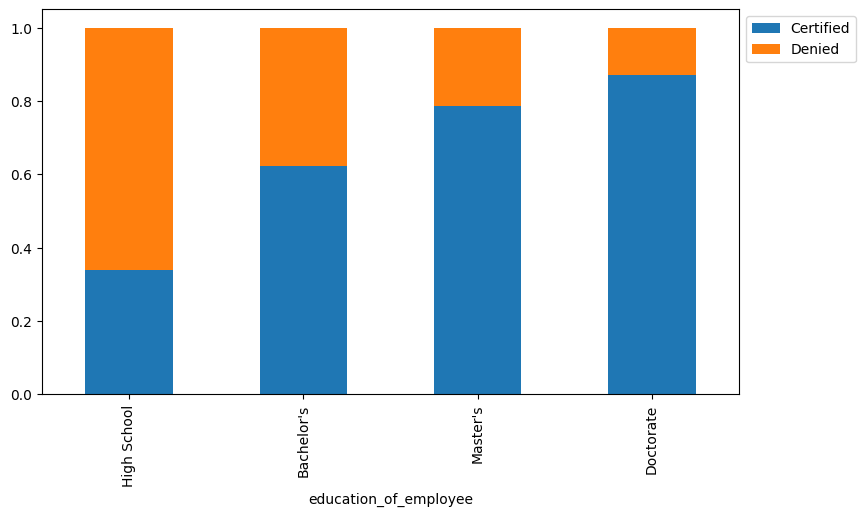

In [ ]:
# education of employment and case status
stacked_barplot(data, "education_of_employee", "case_status")

Observation

- Employees with Doctorates and Master’s degrees have the highest certified rates, with 87.3% and 78.7% certified, respectively.
- High School diploma holders face the highest denial rate, with only 34% certified.
- This  shows that higher education positively impacts visa certified, with employees holding Doctorates and Master’s degrees experiencing the highest certified rates, while High School diploma holders face the highest denial rates.
-  Bachelor’s making up the majority of the total applications.

#### Different regions have different requirements of talent having diverse educational backgrounds. Let's analyze it further

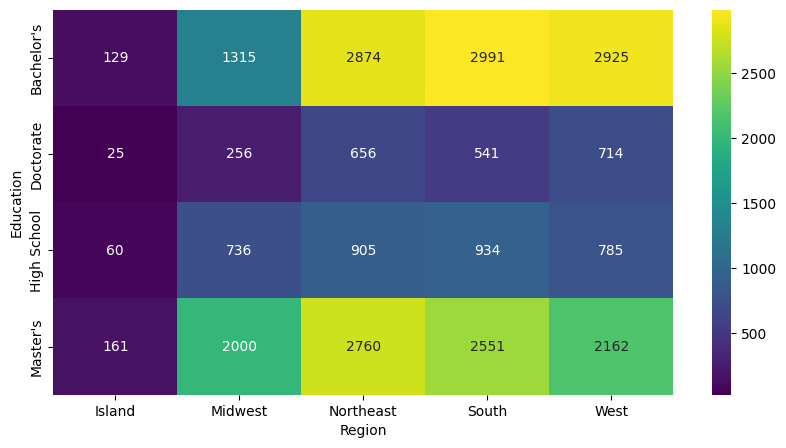

In [ ]:
# heatmap for the crosstab between education and region of employment
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(data['education_of_employee'], data['region_of_employment']),
            annot=True,
            fmt="g",
            cmap="viridis")
plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

Observation

- The heatmap shows a strong correlation between the Island region and all education levels for talent requirements.
- The Midwest, Northeast, South, and West regions exhibit a correlation between doctorate and high school education levels for talent requirements.
- This indicate that the Island region requires talent across all education levels, while the Midwest, Northeast, South, and West regions primarily seek specialized talent with doctorate and high school education levels.

#### Let's have a look at the percentage of visa certifications across each region

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


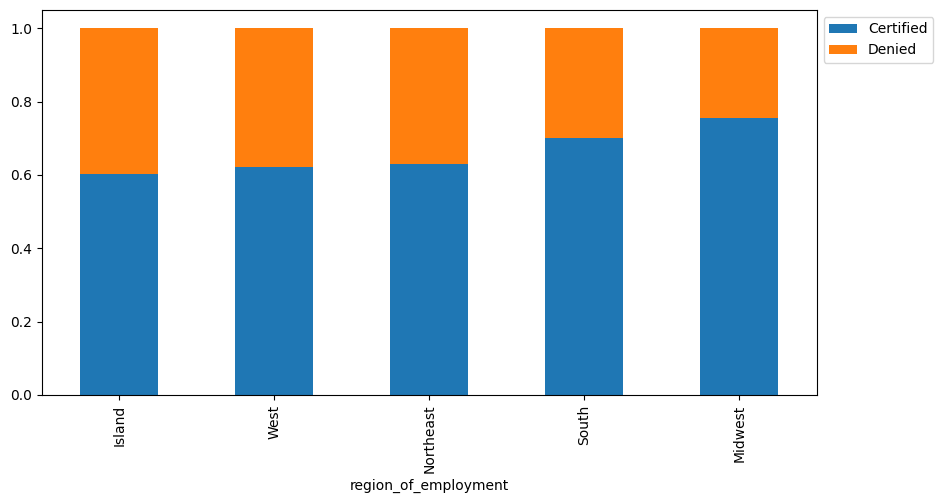

In [ ]:
# region of employment and case status
stacked_barplot(data, "region_of_employment", "case_status")

observation

- The table presents visa application outcomes by region, with a total of 25,480 applications.
- The South and Midwest regions have the highest certified rates, at 70.1% and 75.5%, respectively.
- The Northeast and West regions show slightly lower certified rates of 62.8% and 62.2%.
- The Island region has the lowest number of applications, with 60.3% certified and 39.7% denied.
- This inidicate that the South and Midwest regions have the highest visa certified rates, while the Northeast, West, and Island regions show lower certified rates.

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


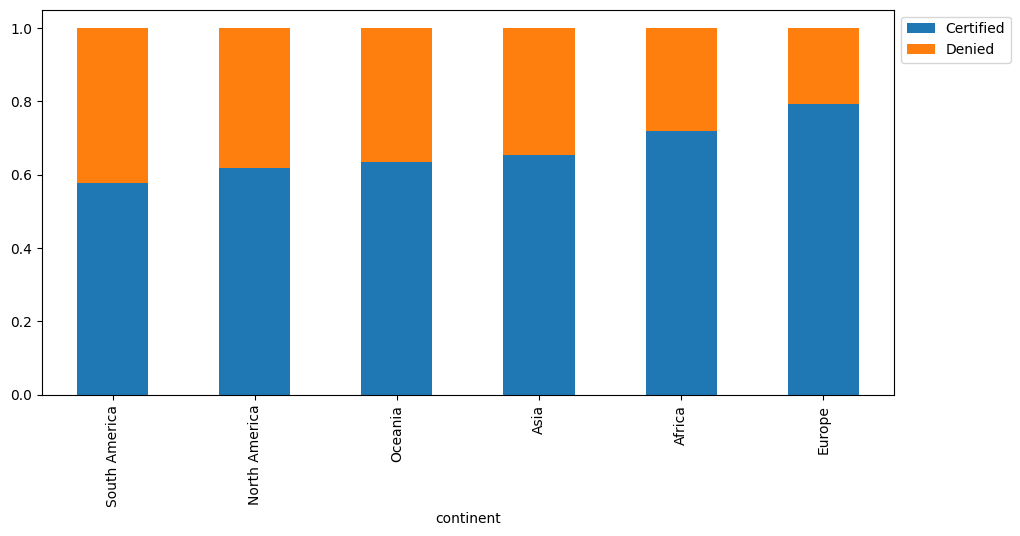

In [ ]:
# continent and case status
stacked_barplot(data, "continent", "case_status")

Observation

- This shows that Europe has the highest visa certified rate at 79.2%, followed by Africa at 71.9%, while Asia has the largest number of applications with a lower certified rate of 59.2%, and South America and Oceania have the lowest application totals with certified rates of 58% and 63.5%, respectively.

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


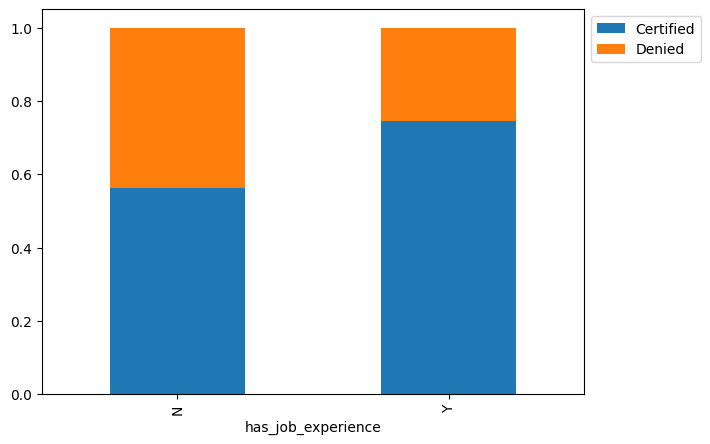

In [ ]:
# job experience and case status
stacked_barplot(data, "has_job_experience", "case_status")

Observation


- This shows that employees with job experience have a significantly higher visa certified rate of 74.5%, compared to 56.1% for those without job experience, indicating that having work experience positively influences visa certified outcomes.

#### Do the employees who have prior work experience require any job training?

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


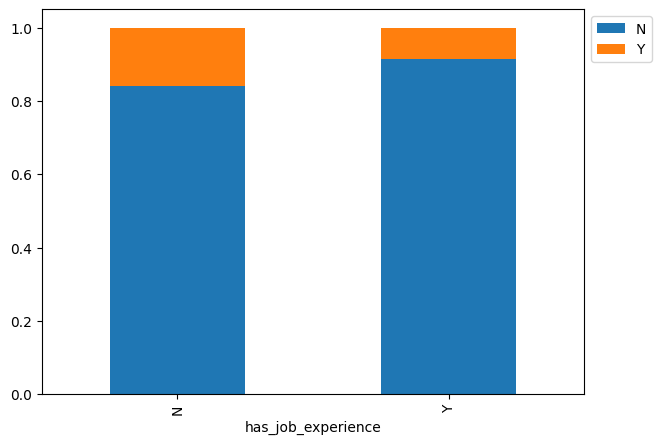

In [ ]:
# job experience and requires_job_training
stacked_barplot(data, "has_job_experience", "requires_job_training")

Observation

- This indicates that employees with prior job experience are more likely to not require job training, with 91.4% of them not needing training, compared to 84.2% of those without job experience, suggesting that prior work experience reduces the need for additional training.

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

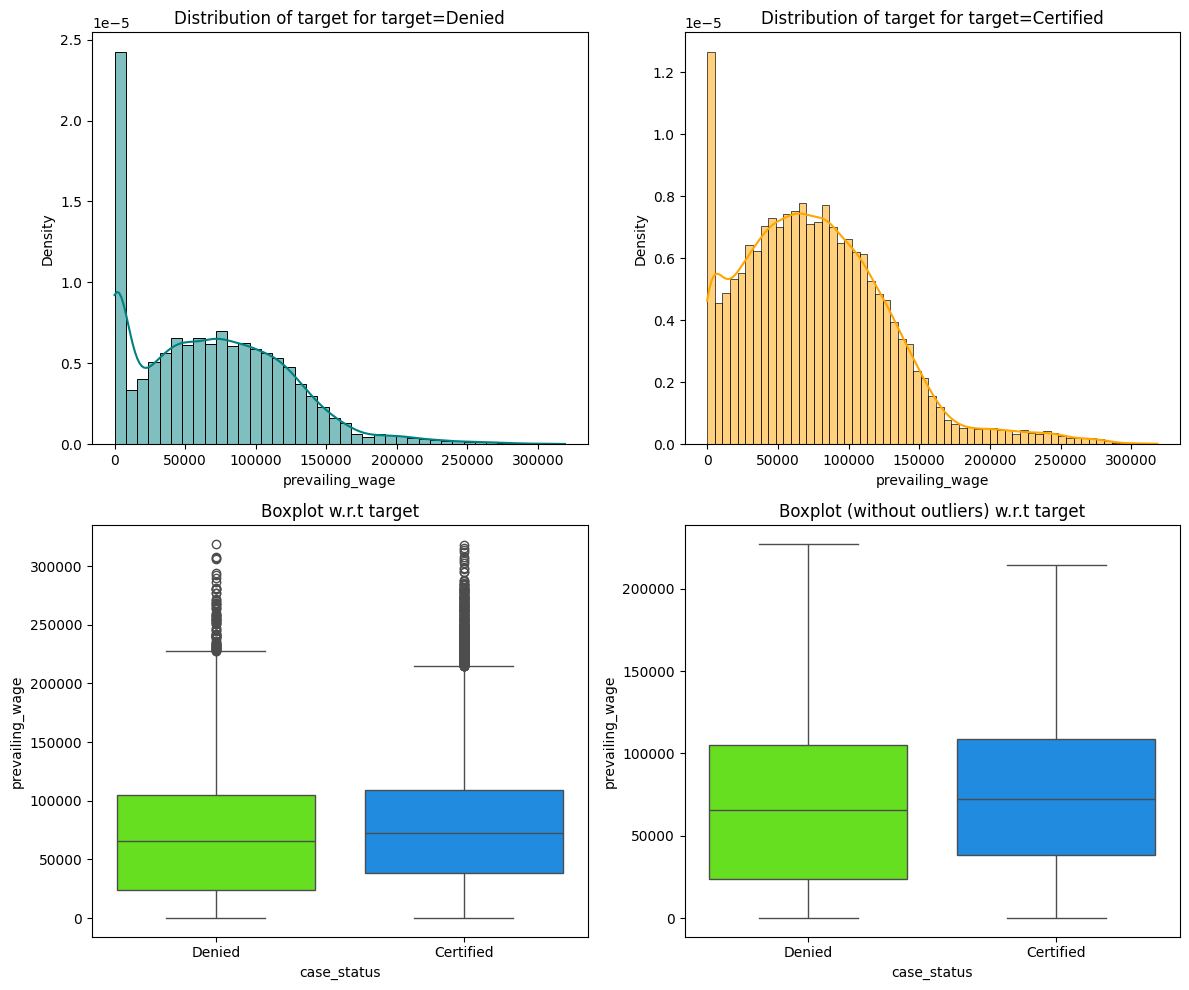

In [ ]:
# find distribution of prevailing wage and case status
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

Observation

- The visa status and prevailing wage data for both denied and certified applications show a peak at the start of the histogram distribution. It then forms a bell curve, with the distribution being right-skewed, featuring a longer tail that indicates the presence of outliers.

- This indicates that although prevailing wages typically follow a standard range, the presence of outliers suggests that other factors, such as regional disparities or job qualifications, may also impact visa outcomes.

#### Checking if the prevailing wage is similar across all the regions of the US

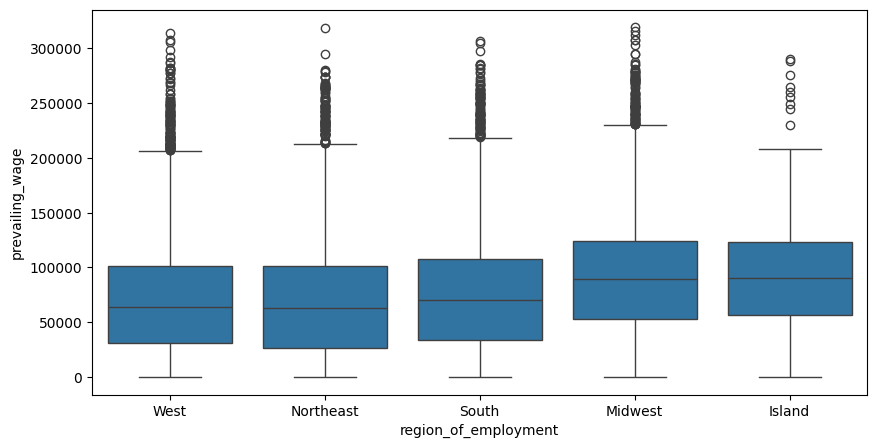

In [ ]:
# region of employment and prevailing wage
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="region_of_employment", y="prevailing_wage")
plt.show()

Observation

- The box plot for prevailing wage and region of employment shows a progressive increase across regions, starting with the West and Northeast, followed by the South, with a slight increase in the Midwest and in the Island.
- This might indicate that the prevailing wage is relatively consistent across the regions.

#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


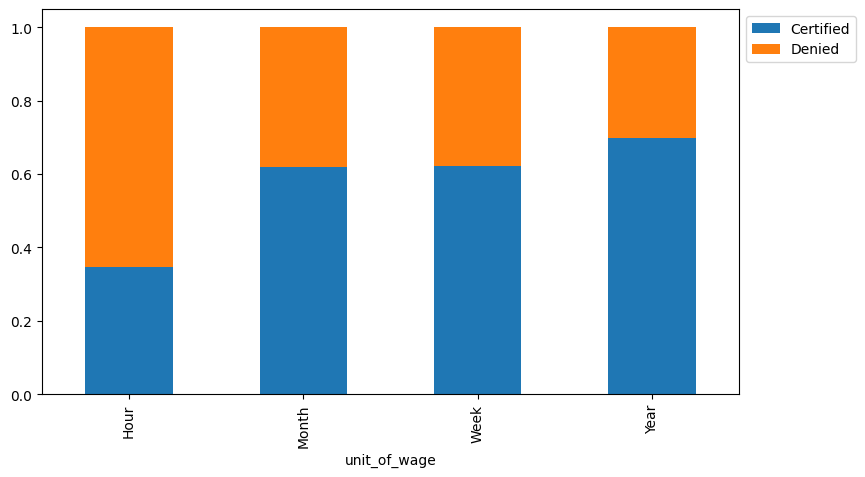

In [ ]:
# unit of wage and case status
stacked_barplot(data, "unit_of_wage", "case_status")

Observation

- This indicates that applications with yearly wages have the highest certified rate at 69.9%, while hourly wage applications have the lowest certified rate at 34.6%, suggesting that the type of wage unit significantly impacts the likelihood of visa certification, with yearly wages being more favorable for certified.








## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Outlier Check

- Let's check for outliers in the data.

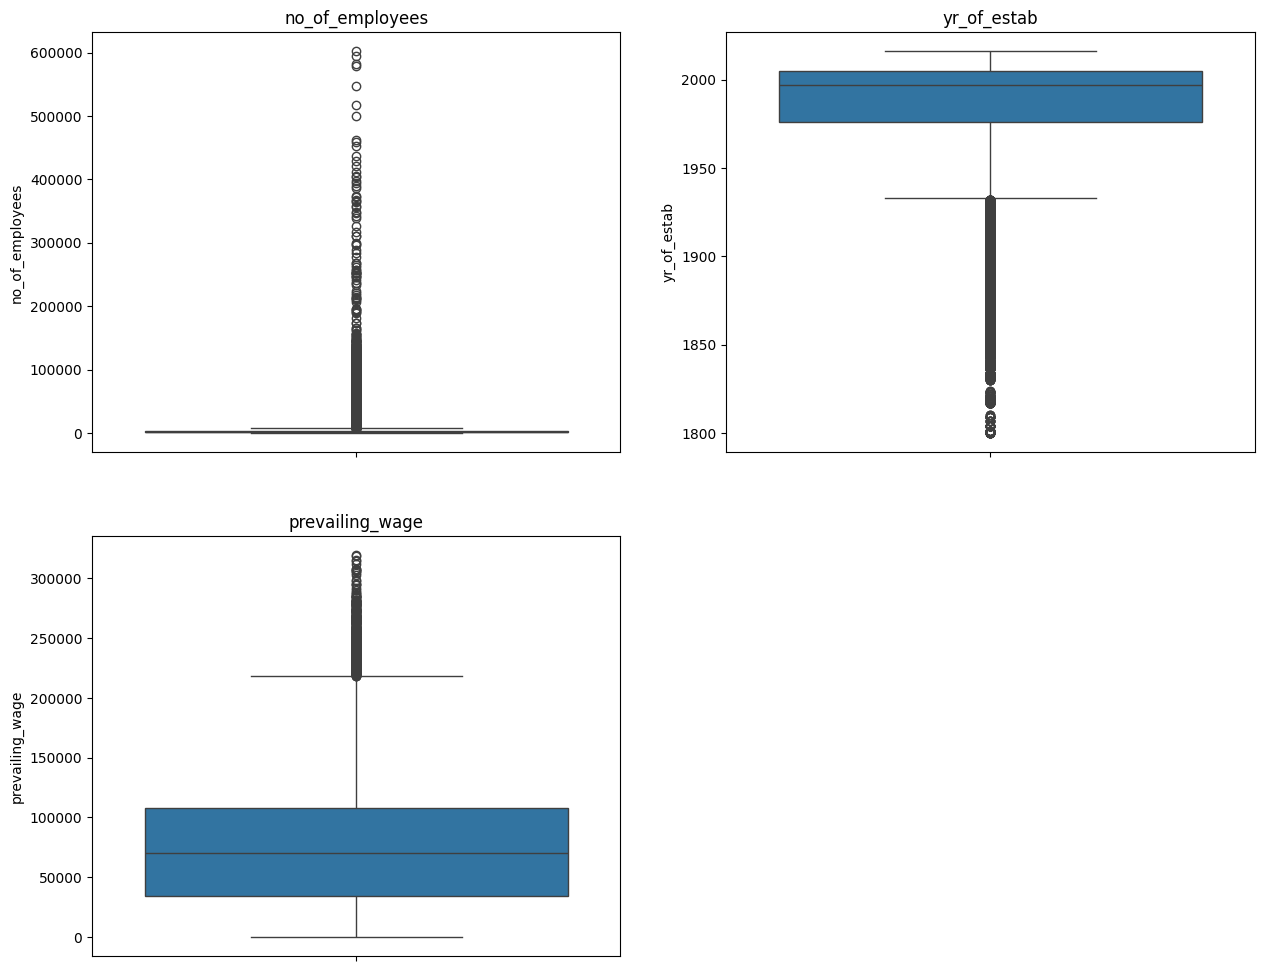

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(2, 2, i + 1)  # Create subplots (2 rows, 2 columns)
    sns.boxplot(data=data, y=variable)
    plt.title(variable) # Add title to each subplot
plt.show()

Observation

- There are quite a few outliers in the data.
- However, we will not treat them as they are proper values

### Data Preparation for modeling

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

X = data.drop("case_status", axis=1)
Y = data["case_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of Test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


Observation

- The training and test sets exhibit a similar, balanced distribution of visa outcomes, with approximately 66.8% certified (class 1) and 33.2% denied (class 0), suggesting consistency and minimal class imbalance between the two sets.

## EDA

- It is a good idea to explore the data once again after manipulating it.

### Bivariate Analysis

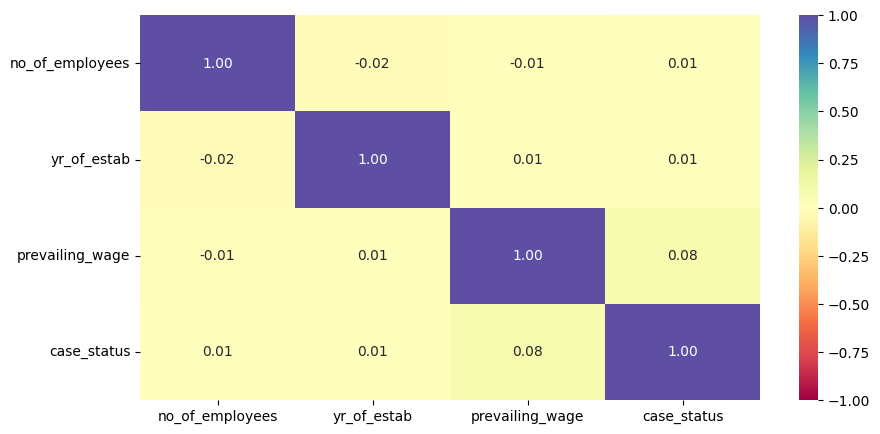

In [ ]:
# correlation between the variables
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- The heatmap still shows a negative correlation between the number of employees with prevailing wage and the year of establishment.

#### Different regions have different requirements of talent having diverse educational backgrounds. Let's analyze it further

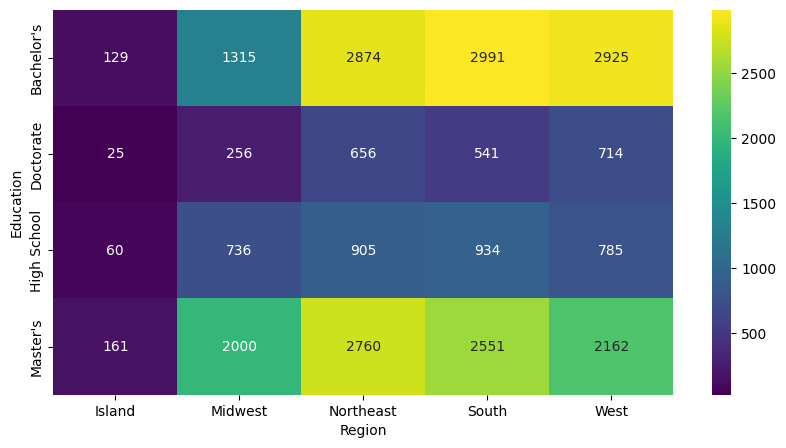

In [ ]:
# heatmap for the crosstab between education and region of employment
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(data['education_of_employee'], data['region_of_employment']),
            annot=True,
            fmt="g",
            cmap="viridis")
plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

Observation

- The heatmap still shows the same, a strong correlation between the Island region and all education levels for talent requirements.
- The Midwest, Northeast, South, and West regions exhibit a correlation between doctorate and high school education levels for talent requirements.
- This still indicate that the Island region requires talent across all education levels, while the Midwest, Northeast, South, and West regions primarily seek specialized talent with doctorate and high school education levels.

## Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified.

### Which case is more important?
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy.



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.
* We will use balanced class weights so that model focuses equally on both classes.

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

#### **Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase
2. The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

### Classification Model

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree - Model Building and Hyperparameter Tuning

### Decision Tree Model

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.664835  0.742801   0.752232  0.747487


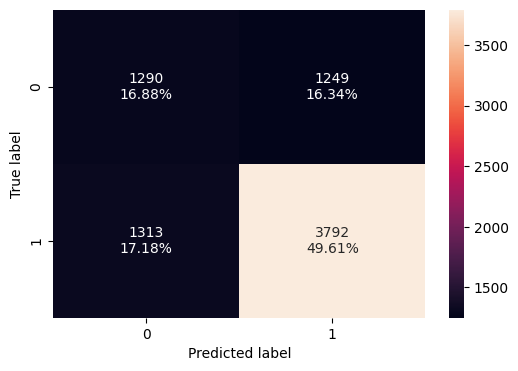

In [ ]:
#Fitting the model
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

#Calculating different metrics
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
print("Training performance:\n", decision_tree_perf_train)
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
print("Testing performance:\n", decision_tree_perf_test)

#Creating confusion matrix
confusion_matrix_sklearn(model, X_test, y_test)

Observation
- The model achieves perfect performance on the training set with 100% accuracy and recall, but fails to generalize well to the test set, demonstrating lower accuracy of 66.48% and moderate recall, precision, and F1 score, suggesting potential overfitting.

- Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning - Decision Tree

In [ ]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.0001, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.710193  0.725762   0.819681  0.769868
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.707483  0.726543   0.815344  0.768386


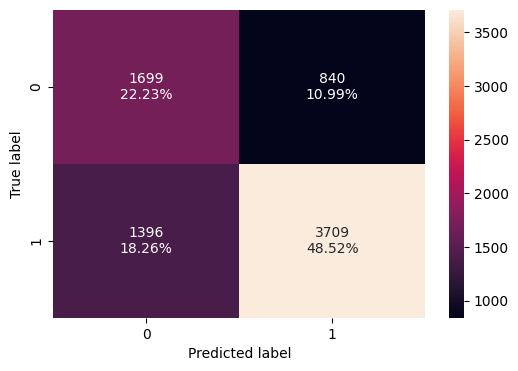

In [ ]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

Observation

- The consistency between the training and testing results suggests that the model is well-tuned, not overfitting, including the F1 score, and delivers reliable performance on both datasets.

-  Let's try some other models.

### Feature importance of Tuned Decision Tree

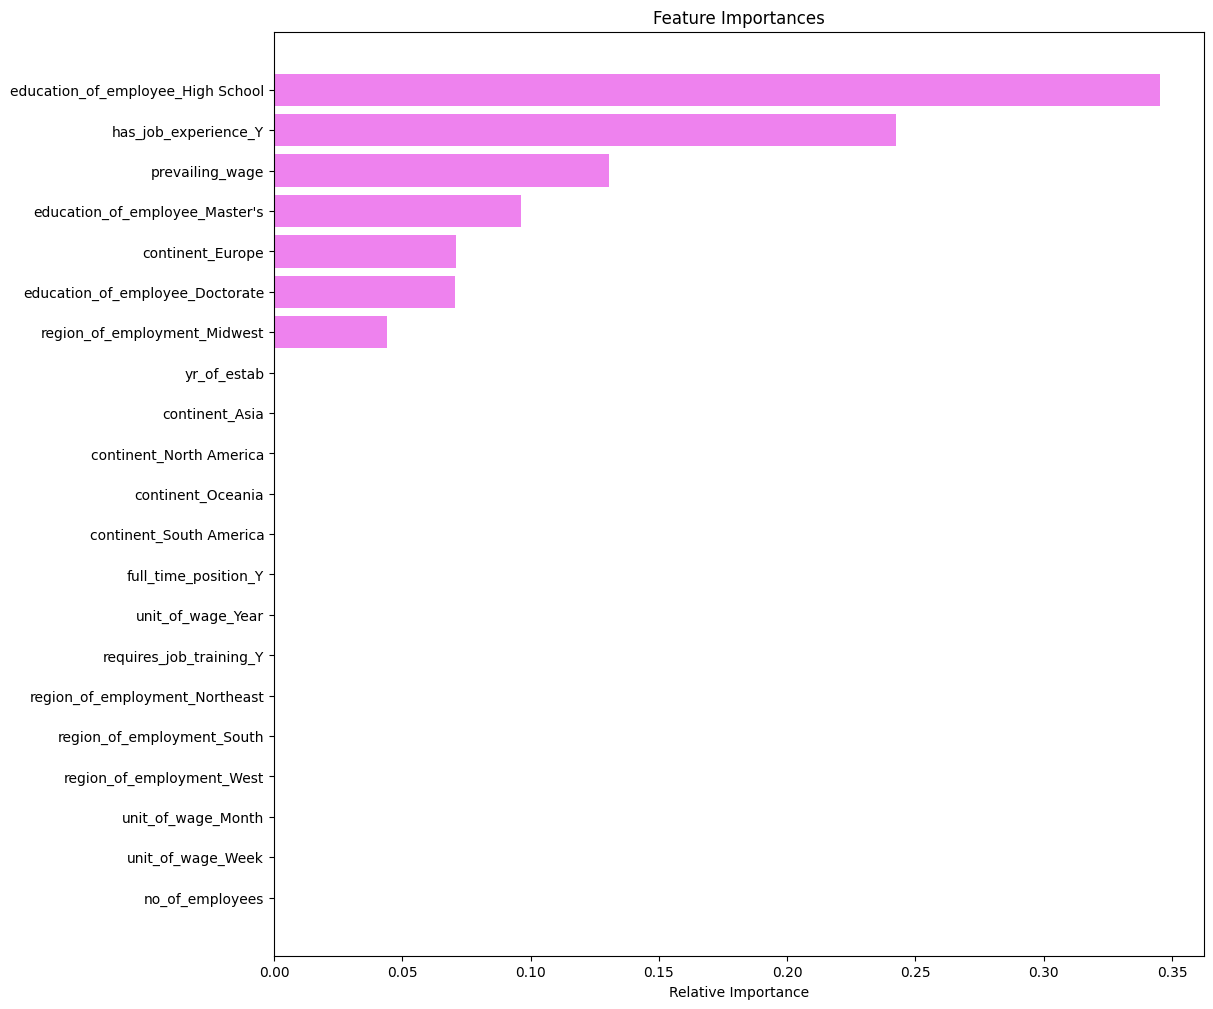

In [ ]:
feature_names = X_train.columns
importances = dtree_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observation

- We can see that the employee's education level, particularly high school, is the most important feature, followed by job experience and prevailing wage.

## Building bagging and boosting models

### Random Forest Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.999944  0.999916        1.0  0.999958
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.720827  0.832125   0.768869  0.799247


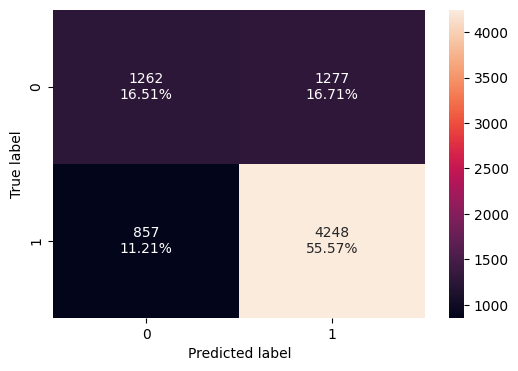

In [ ]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

Observation

- The model shows near-perfect performance on the training set, indicating overfitting, while its significantly lower performance on the test set (72.08% accuracy, 79.92% F1) suggests limited generalization to unseen data.
- Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning - Random Forest

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.4, min_samples_leaf=3, n_estimators=110,
                       oob_score=True, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.795582  0.909091   0.808631  0.855923
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.743066  0.873849   0.771666  0.819585


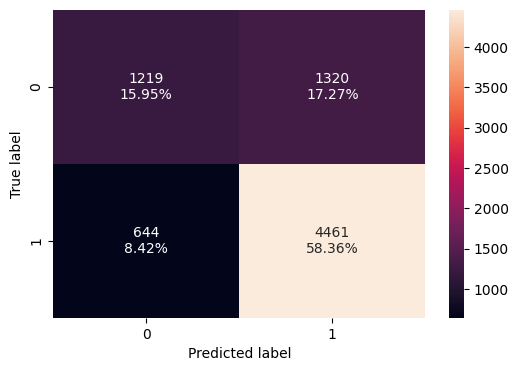

In [ ]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

Observation

- The model shows strong training performance and good generalization to the test set, though a slight decline in accuracy and F1 score.
- Let's try now try bagging models.

### Feature importance of Tuned Random Forest

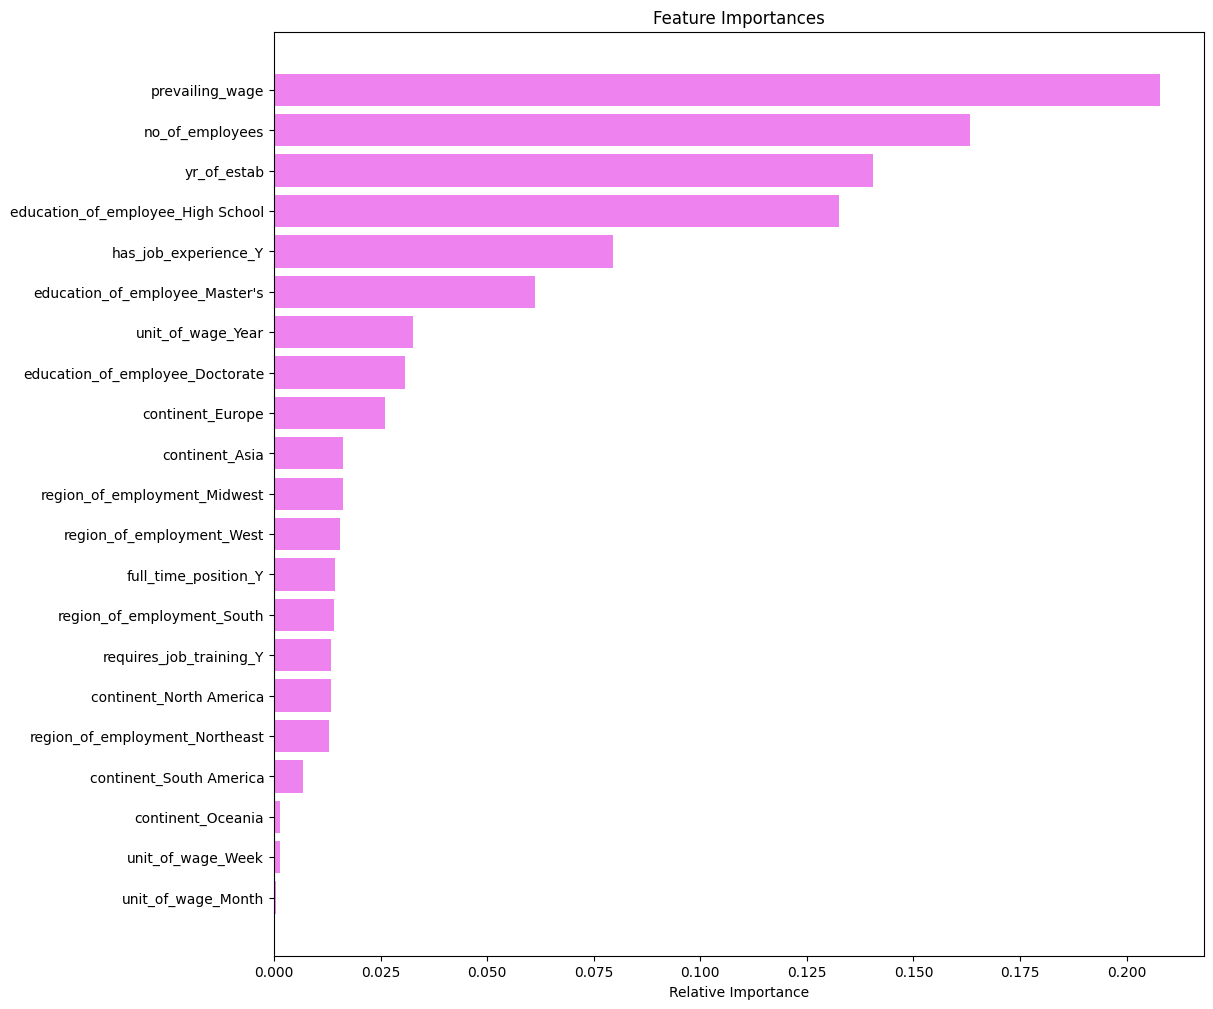

In [ ]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observation

- For the random forest tuned model, the analysis shows that the prevailing wage is the most important feature, followed by the number of employees and the year of establishment.

### Bagging Classifier

   Accuracy    Recall  Precision        F1
0  0.985198  0.985982    0.99181  0.988887
   Accuracy    Recall  Precision        F1
0  0.691523  0.764153   0.771711  0.767913


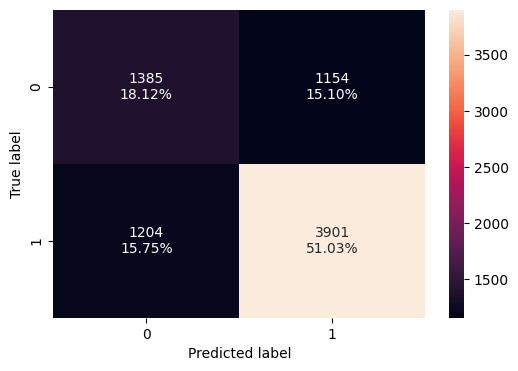

In [ ]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print(bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print(bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

Observation

- This disparity indicates potential overfitting, where the model performs exceptionally on training data but fails to maintain comparable performance on test data.

- Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning - Bagging Classifier

In [ ]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=70,
                  random_state=1)

   Accuracy    Recall  Precision        F1
0   0.99871  0.999916   0.998157  0.999036
   Accuracy    Recall  Precision        F1
0  0.725929  0.888737   0.748186  0.812427


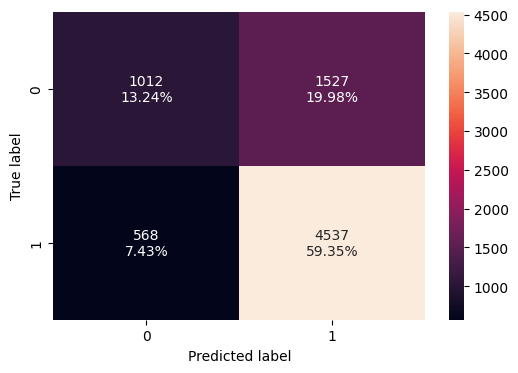

In [ ]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print(bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print(bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

Observation

- This disparity suggests overfitting, where the model is overly tailored to the training data and struggles to generalize to the test data, even though recall and precision remain strong.

- Let's try now try boosting models.

### Feature importance of Tuned Bagging

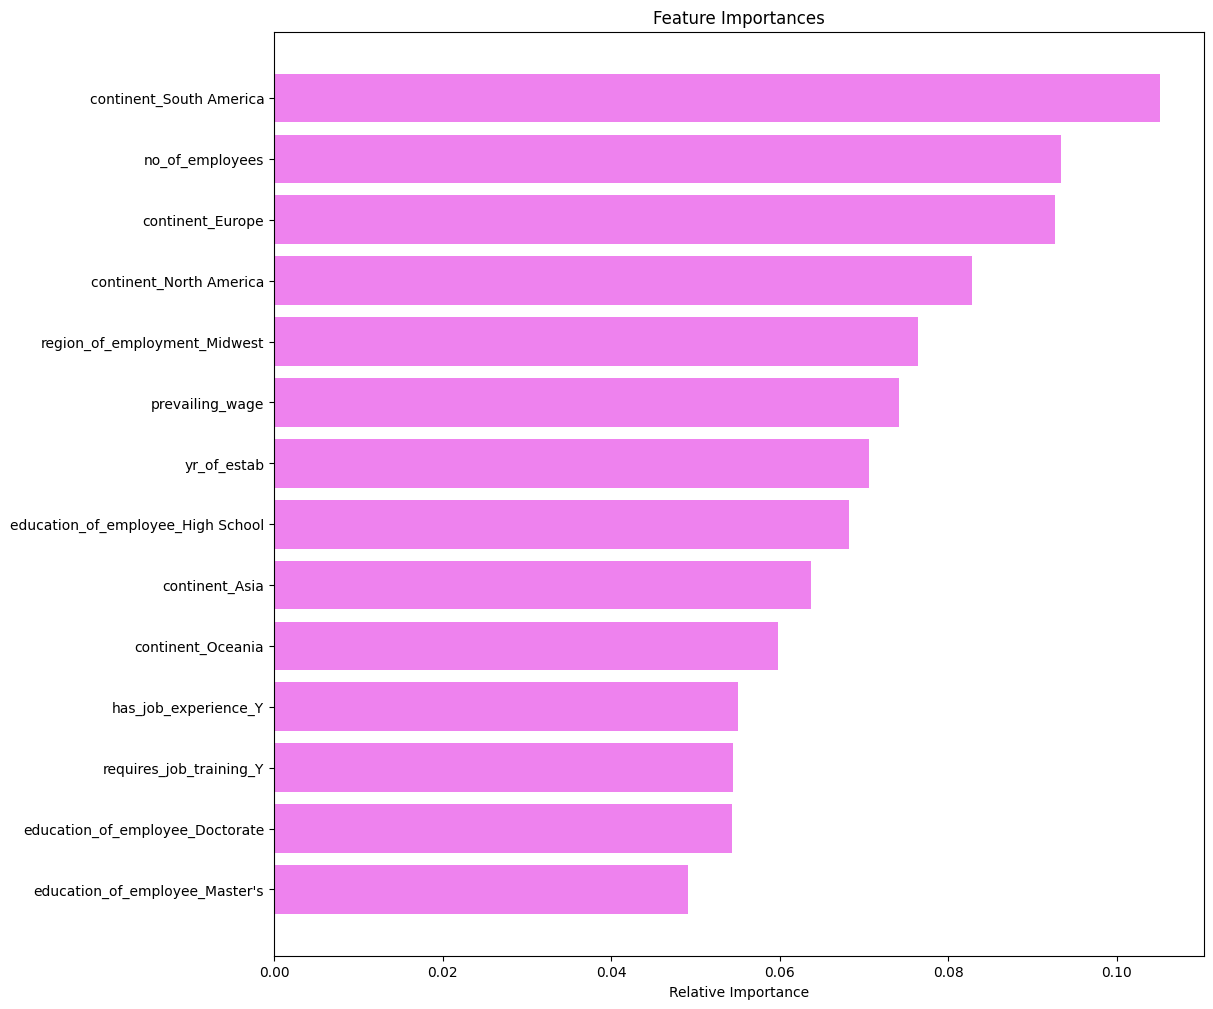

In [ ]:
feature_names = X_train.columns
importances = np.mean([tree.feature_importances_ for tree in bagging_estimator_tuned.estimators_], axis=0)
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observation.

- For the tuned bagging model, the analysis shows that the continent South America is the most important feature, followed by the number of employees, continent Europe, and continent North America.

## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

   Accuracy    Recall  Precision       F1
0  0.738226  0.887182   0.760688  0.81908
   Accuracy    Recall  Precision        F1
0  0.734301  0.885015   0.757799  0.816481


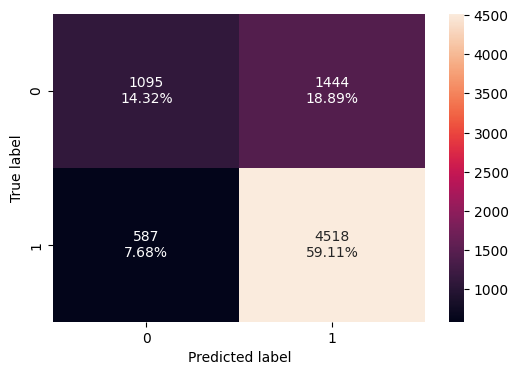

In [ ]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

Observation

- The model shows consistent performance on both the training and testing sets, with an F1 score of 81.65%, indicating it is well-balanced and not susceptible to overfitting..
- Let’s review the tuned hyperparameters.

### Hyperparameter Tuning - AdaBoost Classifier

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, random_state=1)

   Accuracy    Recall  Precision        F1
0  0.754317  0.889365   0.775679  0.828641
   Accuracy    Recall  Precision        F1
0   0.74045  0.881293   0.765527  0.819341


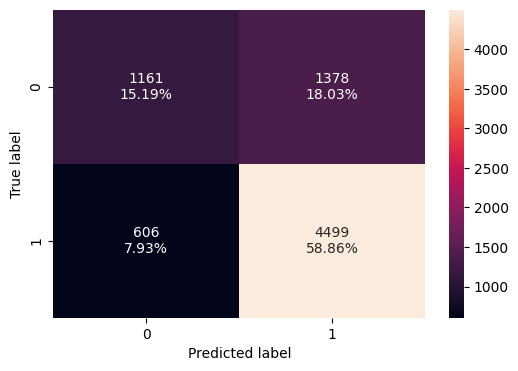

In [ ]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

Observation

- The tuned AdaBoost model shows good generalization to the test set, with only minor performance degradation and an F1 score of 81.93%, indicating it is not overfitting.

### Feature importance of Tuned AdaBoost

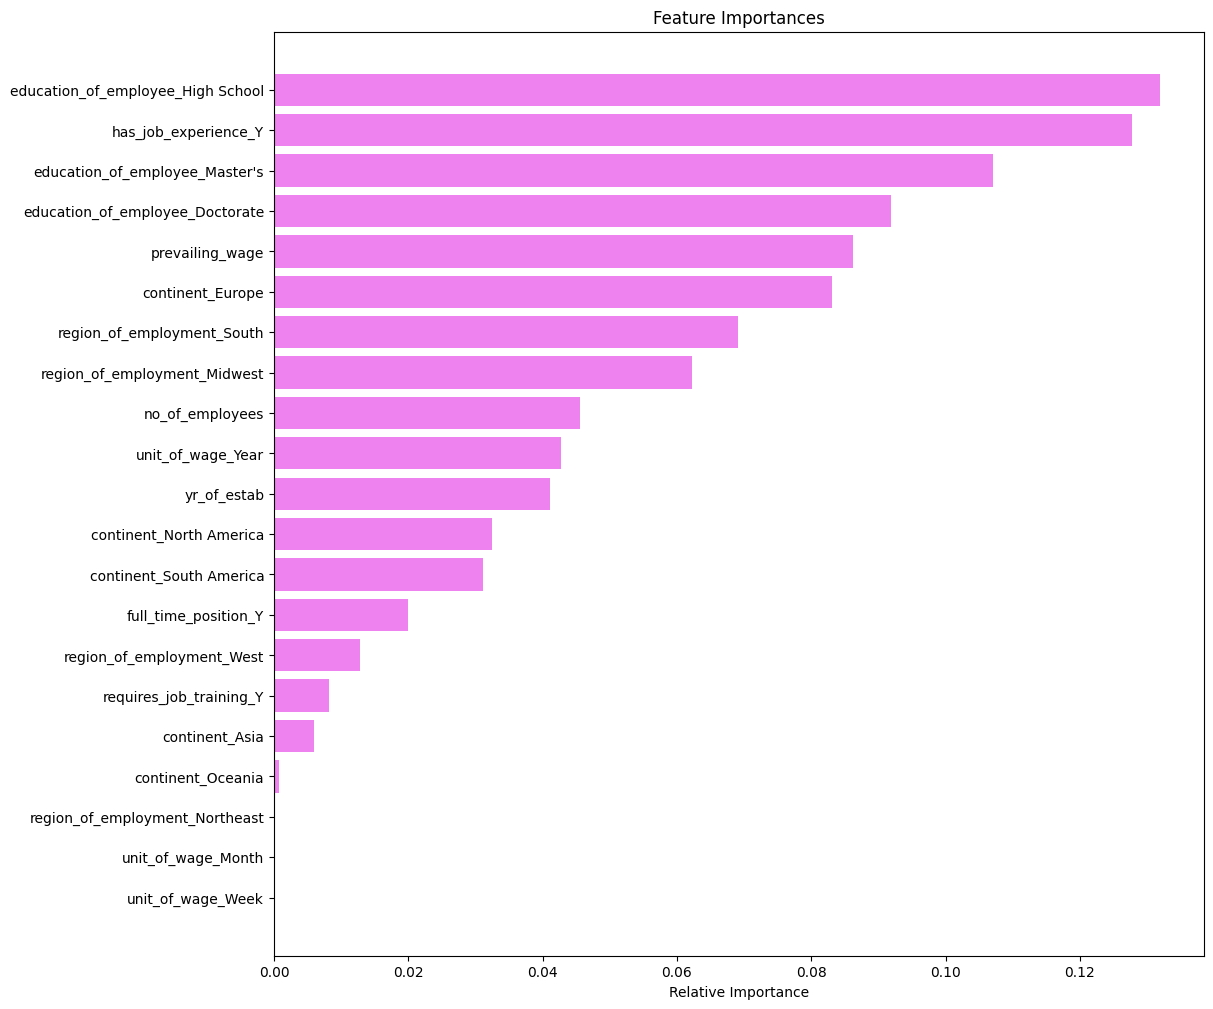

In [ ]:
feature_names = X_train.columns
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observation

-
For the tuned AdaBoost model, the analysis indicates that the most important feature is the employee's high school education, followed by job experience and the employee's master's education.

### Gradient Boosting Classifier

Training performance:
    Accuracy   Recall  Precision        F1
0  0.758802  0.88374   0.783042  0.830349
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.744767  0.876004   0.772366  0.820927


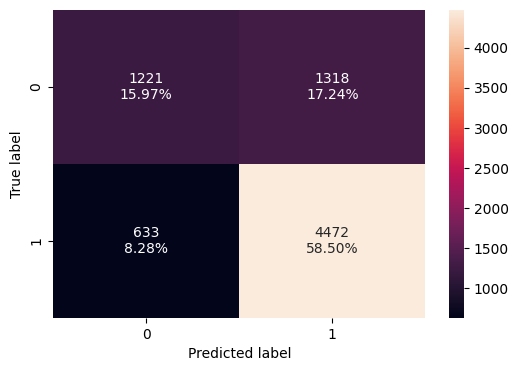

In [ ]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

Observation

- The model shows consistent performance across the training and testing sets, with an F1 score of 82.09%, demonstrating good generalization and no significant overfitting.

### Hyperparameter Tuning - Gradient Boosting Classifier

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7, random_state=1,
                           subsample=0.9)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.753756  0.883992   0.777712  0.827453
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.742936  0.878355   0.769389  0.820269


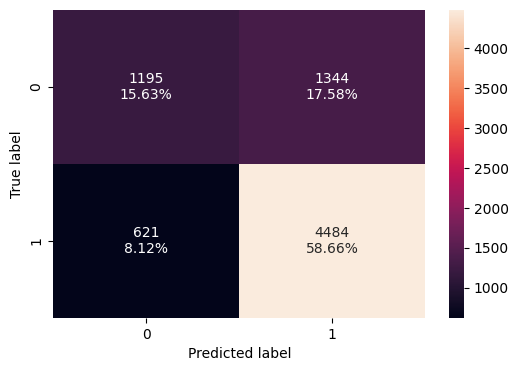

In [ ]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

Observation

- The tuned model for training demonstrates strong recall and balanced precision, effectively capturing the majority of positive cases, while the test metrics, though slightly lower, remain well-aligned and supported by a solid F1 score of 82.03%.

### Feature importance of Tuned Gradient Boosting

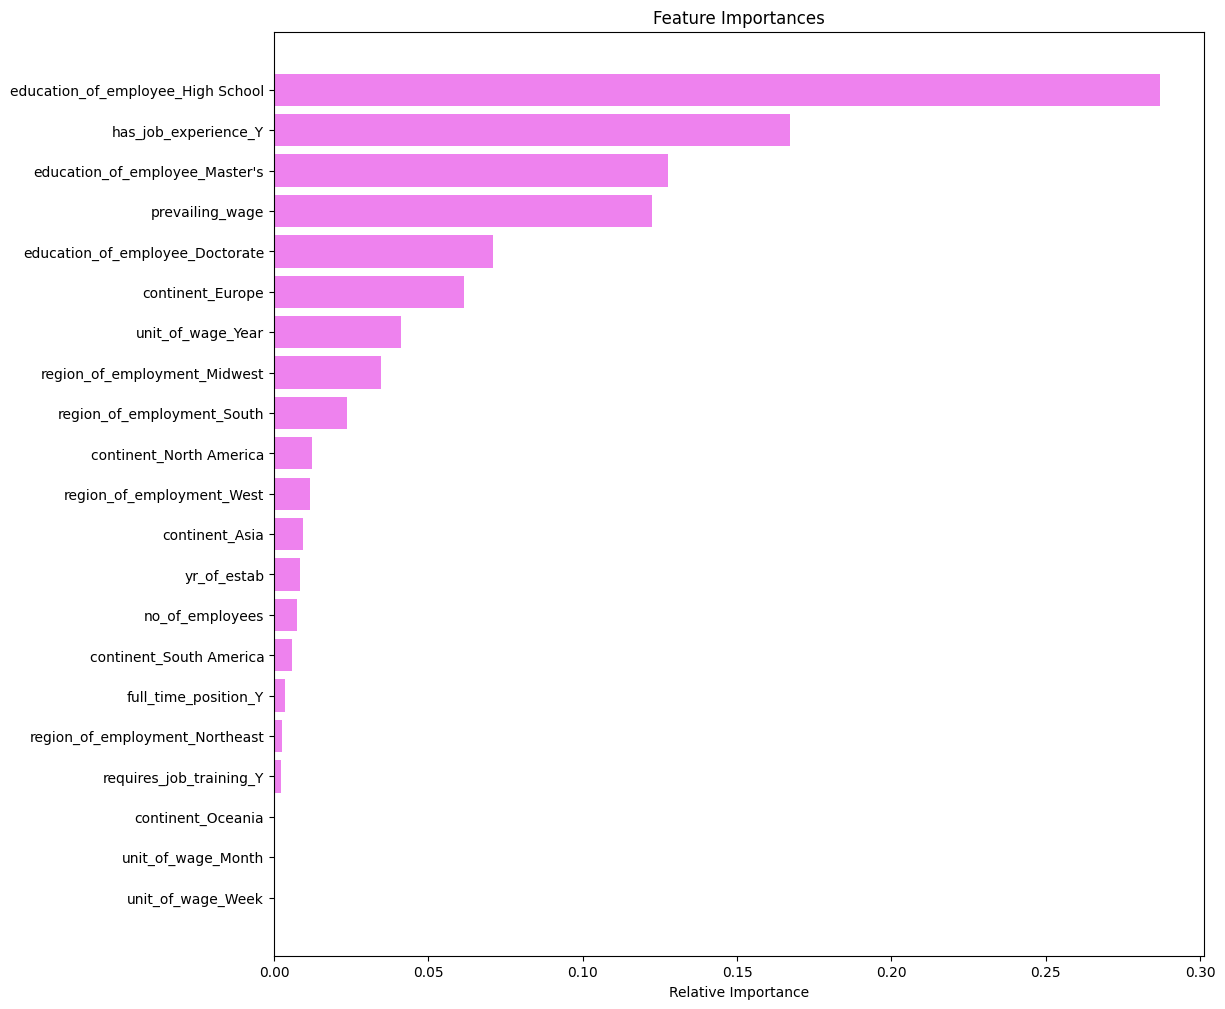

In [ ]:
feature_names = X_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observation

- The important features of the tuned Gradient Boosting model reveal that the education level of employees with a high school is the most significant feature, followed by job experience and employees with a master’s degree, similar to the tuned AdaBoost model.

### XGBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.850807  0.935952   0.854537  0.893394
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.729984  0.851518   0.768972  0.808143


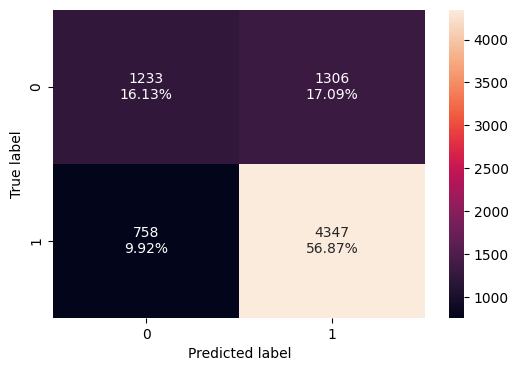

In [ ]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

Observation

- The model performs well on training data but shows reduced performance on the test set, suggesting potential overfitting.
- Let's review the tuned hyperparameter model.

### Hyperparameter Tuning - XGBoost Classifier

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

Training performance:
    Accuracy    Recall  Precision        F1
0   0.76211  0.888189   0.784243  0.832986
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.744898  0.877767   0.771655  0.821298


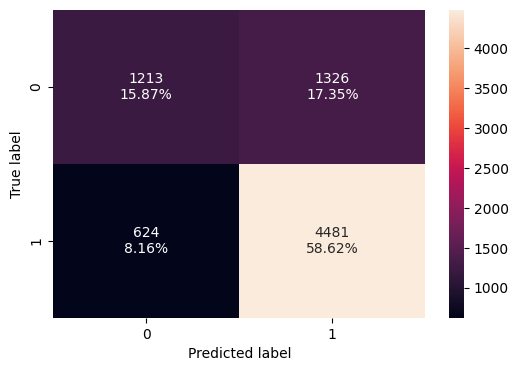

In [ ]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

Observation

- The XGBoost Classifier model demonstrates strong recall and balanced precision on both training and testing sets, with minimal performance degradation and an F1 score of 82.13% on the test set, indicating good generalization without significant overfitting.

### Feature importance of Tuned XGBoost

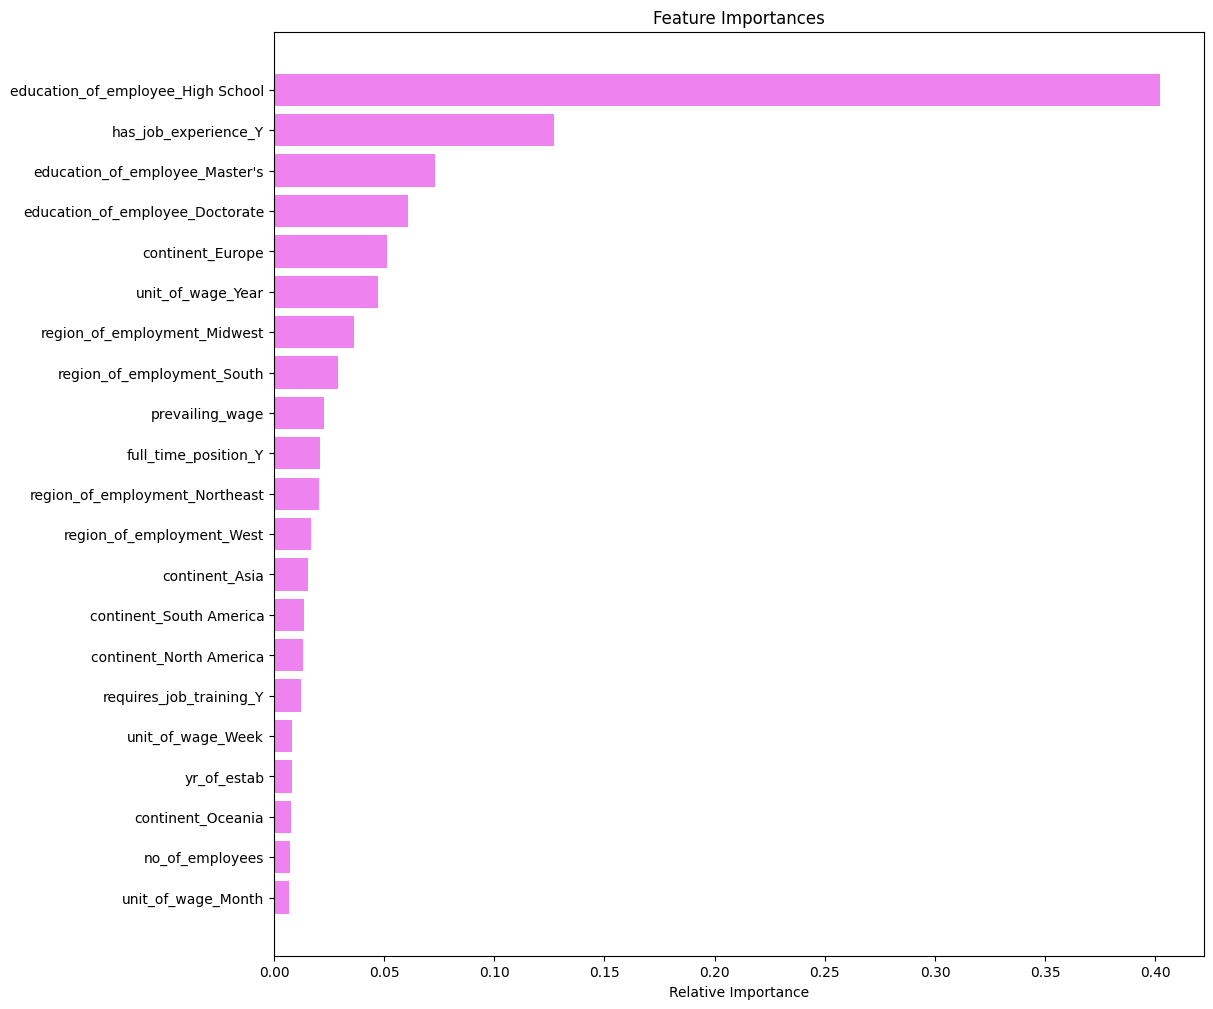

In [ ]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observation

- The important features of the tuned XGBoost model show significant importance on the education level of employees with a high school, followed by job experience and employees with a master’s degree, similar to the tuned AdaBoost model and Gradient Boosting Model.

## Stacking Classifier

In [ ]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ("AdaBoost", ab_classifier)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(max_samples=0.4,
                                                       min_samples_leaf=3,
                                                       n_estimators=110,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           learning_rate=0.05,
                                                           max_features=0.7,
                                                           random_state=1,
                                                           subsample=0.9)),
                               ('AdaBoost',
                                AdaBoostClassifier(random_stat...
                                                 feature_types=None, gamma=3,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.05,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=50, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

Training performance:
    Accuracy    Recall  Precision       F1
0  0.771586  0.894569   0.790872  0.83953
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.743851  0.877963     0.7705  0.820729


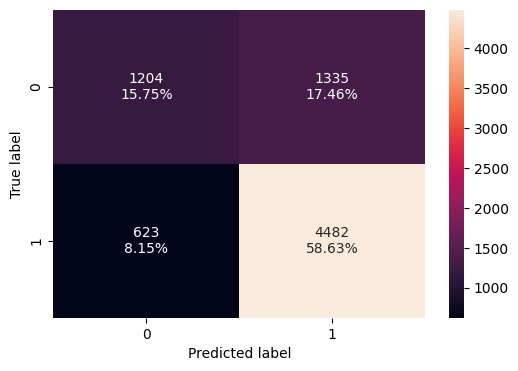

In [ ]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

Observation

- The stacking model achieves strong performance on both training and testing sets, with a high recall indicating its ability to identify positive cases effectively. The F1 score of 83.95% in training and 82.07% in testing demonstrates balanced precision and recall, while the minimal drop in metrics suggests good generalization without overfitting.

## Model Performance Comparison and Conclusions

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.710193,0.985198,0.998710,0.999944,0.795582,0.738226,0.754317,0.758802,0.753756,0.850807,0.762110,0.771586
Recall,1.0,0.725762,0.985982,0.999916,0.999916,0.909091,0.887182,0.889365,0.883740,0.883992,0.935952,0.888189,0.894569
Precision,1.0,0.819681,0.991810,0.998157,1.000000,0.808631,0.760688,0.775679,0.783042,0.777712,0.854537,0.784243,0.790872
F1,1.0,0.769868,0.988887,0.999036,0.999958,0.855923,0.819080,0.828641,0.830349,0.827453,0.893394,0.832986,0.839530


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.664835,0.707483,0.691523,0.725929,0.720827,0.743066,0.734301,0.740450,0.744767,0.742936,0.729984,0.744898,0.743851
Recall,0.742801,0.726543,0.764153,0.888737,0.832125,0.873849,0.885015,0.881293,0.876004,0.878355,0.851518,0.877767,0.877963
Precision,0.752232,0.815344,0.771711,0.748186,0.768869,0.771666,0.757799,0.765527,0.772366,0.769389,0.768972,0.771655,0.770500
F1,0.747487,0.768386,0.767913,0.812427,0.799247,0.819585,0.816481,0.819341,0.820927,0.820269,0.808143,0.821298,0.820729


Observation

- The comparison of decision tree models, ensemble models, and stacking classifiers reveals that decision trees outperform others in terms of accuracy and recall, but show a decline in testing performance due to potential overfitting.

- Tuned ensemble models, such as Bagging, Random Forest, AdaBoost, Gradient Boost, and XGBoost, show strong performance in recall and F1 scores.

- The stacking classifier, with an impressive F1 score of 82.1%, offers better generalization.


### Important features of the final model for Tuned Gradient Boosting



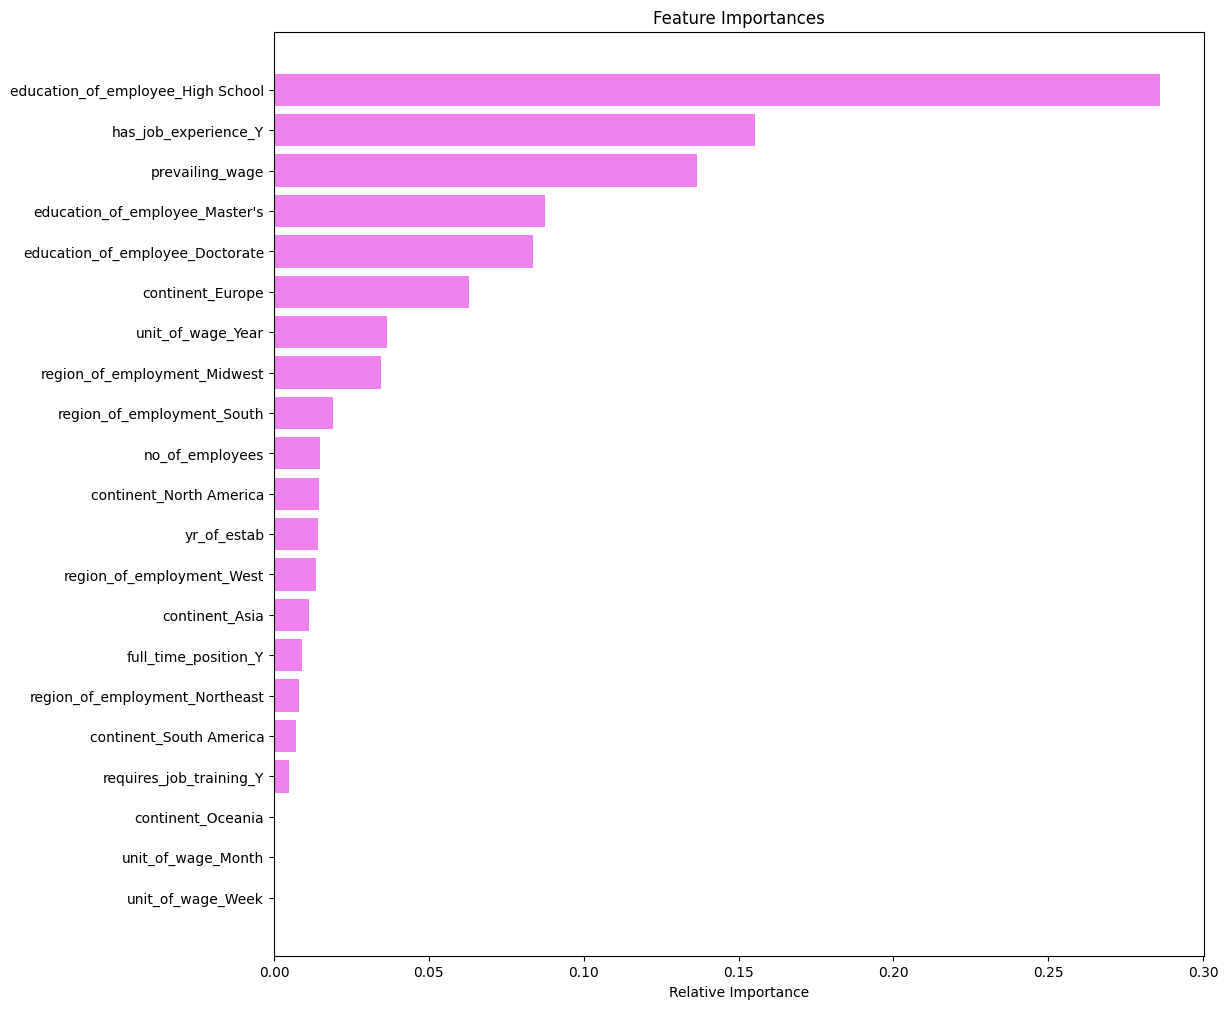

In [ ]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observation

The important features of the tuned Gradient Boosting Model show significant importance on the education level of employees with a high school, followed by job experience and employees with a master’s degree.

## Actionable Insights and Recommendations

### **Actionable Insights**

The analysis highlights the following key features influencing visa-certified outcomes:

**Highly Significant Features:**
- **Education Level:** High school education of the employee.
- **Work Experience:** Having previous job experience.
- **Wages:** Prevailing wage offered to the applicant.

**Moderately Important Features:**
- **Education Level:** Master's and doctorate degrees.
- **Continent of Origin:** Europe.

**Fairly Important Features:**
- **Wage Unit:** Annual wage payments.
- **Region of Employment:** Midwest and South regions.

**Least Important Features:**
- **Number of employees in the organization.**
- **Continent of Origin:** North America, Asia, and South America.
- **Year of Establishment of the Organization.**
- **Region of Employment:** West and Northeast regions.
- **Job Training Requirement:** whether job training is required or not.
- **Employment Position Type:** Whether the position is full-time or not.


Other features not listed here may have minimal or no significant impact on visa certification decisions.

### **Recommendations**

1. **Automated Decision Support System:**

  - Develop and deploy a machine learning-based classification system that predicts visa certification status based on key applicant features.
  - Integrate the model into the existing visa processing workflow to assist human decision-makers, flagging high-confidence approvals and denials for automation.

2. **Data-Driven Policy Optimization:**

  - Use insights from the analysis to refine visa policies, focusing on the drivers that significantly influence approvals (e.g., prevailing wages, education levels, and job experience).
  - Adjust criteria for specific sectors or regions to address labor market gaps effectively.

3. **Applicant Profile Scoring:**

  - Create a **visa eligibility scoring system** that assigns scores to applicants based on influential factors.
  - Use the scores to prioritize applications and allocate resources for manual reviews more efficiently.

4. **Stakeholder Communication Portal:**

  - Develop a transparent **communication platform** for applicants to understand how their profiles align with approval criteria.
  - Provide actionable feedback for applicants to improve their profiles, such as obtaining additional qualifications or meeting prevailing wage requirements.

5. **Monitoring and Continuous Improvement:**

  - Regularly monitor the classification model's performance and update it based on changes in labor market trends, policy updates, and applicant demographics.
  - Use A/B testing to evaluate the impact of the automated system on visa processing time and accuracy.

6. **Risk mitigation and fairness assurance:**

  - Implement fairness checks to ensure the model does not inadvertently disadvantage applicants based on irrelevant factors like region or training requirements.
  - Build an escalation system for complex or high-risk cases requiring human intervention.

7. **Sector-Based Visa Allocation Strategy:**

  - Utilize model insights to recommend visa quotas for sectors or regions based on demand and supply trends, ensuring strategic workforce alignment.

These solutions can enhance operational efficiency, reduce processing times, and ensure fair and data-driven decisions in the visa approval process.

In [82]:
!jupyter nbconvert --to html DSBA_Project_ET_EasyVisa_Fullcode.ipynb

[NbConvertApp] Converting notebook DSBA_Project_ET_EasyVisa_Fullcode.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 42 image(s).
[NbConvertApp] Writing 2526233 bytes to DSBA_Project_ET_EasyVisa_Fullcode.html
